### Implementing Hierarchial Clustering algorithm

#### Generating dummy data

In [1]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
X,y=make_blobs(n_samples=1000,centers=8,n_features=2,random_state=800)

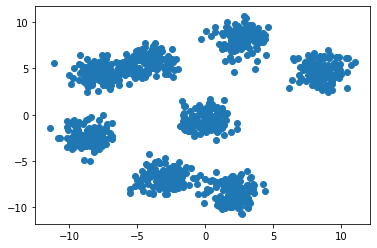

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

##### Generate distance matrix using linkage present in scipy

In [6]:
distances=linkage(X,method="centroid",metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


##### Customizing the dendogram & stylize it

In [7]:
def annotated_dendogram(*args,**kwargs):
    scipy_dendogram=dendrogram(*args,truncate_mode='lastp',show_contracted=True,leaf_rotation=90)
    plt.title('Blob data Dendogram')
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    for i,d,c in zip(scipy_dendogram['icoord'],scipy_dendogram['dcoord'],scipy_dendogram['color_list']):
        x=0.5*sum(i[1:3])
        y=d[1]
        if y>10:
            plt.plot(x,y,'o',c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),textcoords='offset points',va='top', ha='center')    
    return scipy_dendogram

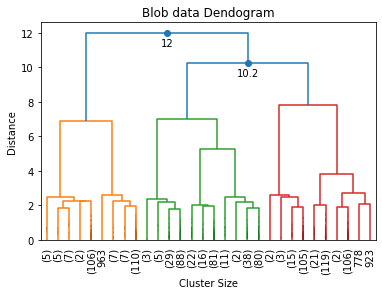

<Figure size 1440x1296 with 0 Axes>

In [10]:
dn=annotated_dendogram(distances)
plt.figure(figsize=(20,18))
plt.show()

##### Dendogram shows a potential path that can be used to create three separate groups around the distance of seven that are distinctly different enough to stand on their own.

##### Use fcluster on the distances

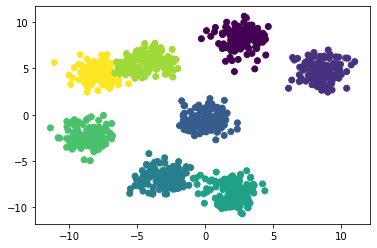

<Figure size 720x576 with 0 Axes>

In [12]:
scipy_clusters=fcluster(distances,3,criterion="distance")
plt.scatter(X[:,0],X[:,1],c=scipy_clusters)
plt.figure(figsize=(10,8))
plt.show()

#### Applying different linkage criteria and see the result: ['centroid', 'single', 'complete', 'average', 'weighted']

##### I have already generated the sample data so using that only for this purpose,so again visualizing data.

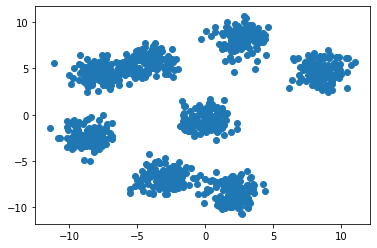

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [14]:
# creating a list of possible linkage methods:
methods=['centroid','single','complete','average','weighted']

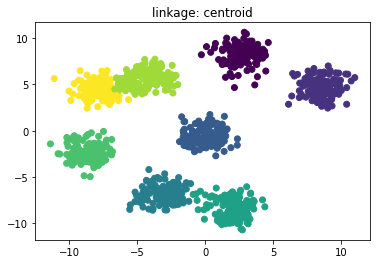

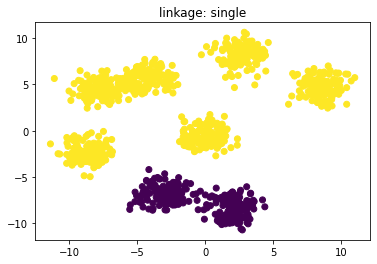

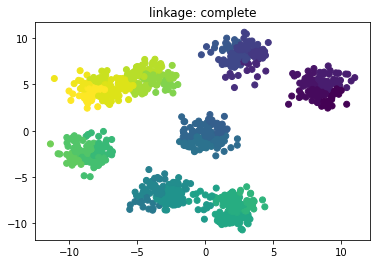

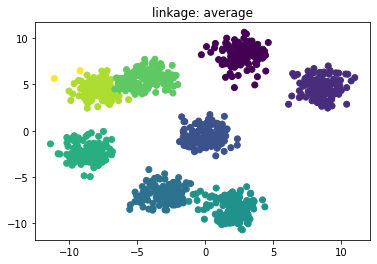

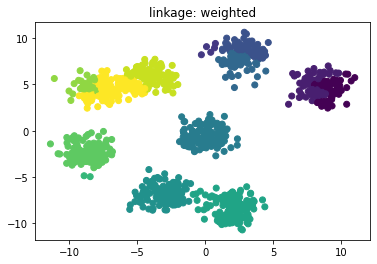

In [15]:
# loop through all methods and displaying the effect of each method on dataset
for method in methods:
    distances=linkage(X,method=method,metric="euclidean")
    clusters=fcluster(distances,3,criterion="distance")
    plt.title('linkage: '+method)
    plt.scatter(X[:,0],X[:,1],c=clusters)
    plt.show()

##### by simply changing the linkage criteria, we can dramatically change the efficacy of our clustering. In this dataset, centroid and average linkage work best at finding discrete clusters that make sense